<a href="https://colab.research.google.com/github/boreumlee/traffic/blob/main/%EA%B5%90%ED%86%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 랜덤 데이터 생성 함수
def generate_traffic_data(start_date, days):
  date_range = pd.date_range(start=start_date, periods=days, freq='D') # freq='D' ==> day 를 뜻한다는 것
  traffic_data = {
      'date': date_range,
      'traffic_volume': np.random.randint(500, 5000, size=len(date_range)) # 교통량 (500~5000 랜덤값)
  }
  return pd.DataFrame(traffic_data)

# 1년치 데이터 생성
df = generate_traffic_data('2024-01-01', 365)
print(df.head())

        date  traffic_volume
0 2024-01-01            2301
1 2024-01-02            1342
2 2024-01-03             501
3 2024-01-04            4605
4 2024-01-05            3645


In [2]:

# HDF5 파일로 저장
# HDF5 파일 안에 데이터를 저장할 이름(그룹) => key:'traffic'
# HDF5는 하나의 파일 안에 여러 개의 데이터셋을 저장 가넝
# key를 통해 각 데이터 구분하는 역할을 함
# JSON파일에서 key-value 느낌
# mode='w' (기존 파일 덮어쓰기(write)), mode='a' (기존 데이터 유지하고 새로운 데이터 추가(append))

# 예)
# df1.to_hdf('data.h5', key='traffic', mode='w')  # 교통량 데이터 저장
# df2.to_hdf('data.h5', key='weather', mode='a')  # 날씨 데이터 추가 저장


df.to_hdf('traffic_data.h5', key='traffic', mode='w')

# 저장된 파일 불러오기
df_loaded=pd.read_hdf('traffic_data.h5', key='traffic')
print(df_loaded.head())

        date  traffic_volume
0 2024-01-01            2301
1 2024-01-02            1342
2 2024-01-03             501
3 2024-01-04            4605
4 2024-01-05            3645


In [7]:
import time

df=pd.read_hdf('traffic_data.h5', key='traffic')

def compute_mean_traffic(df):
  return df.groupby('date')['traffic_volume'].mean()

start_time=time.time()
result = compute_mean_traffic(df)
end_time=time.time()

print('하루 평균 교통량 계산')
print(result.head())
print(f'실행 시간: {end_time - start_time:.2f}초')

하루 평균 교통량 계산
date
2024-01-01     605.0
2024-01-02    3988.0
2024-01-03    4658.0
2024-01-04    2971.0
2024-01-05    4759.0
Name: traffic_volume, dtype: float64
실행 시간: 0.01초


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# HDF5 파일에서 데이터 로드
df = pd.read_hdf('traffic_data.h5', key='traffic')

# 날짜를 인덱스로 설정
df.set_index('date', inplace=True)

print(df.head())

            traffic_volume
date                      
2024-01-01            2301
2024-01-02            1342
2024-01-03             501
2024-01-04            4605
2024-01-05            3645


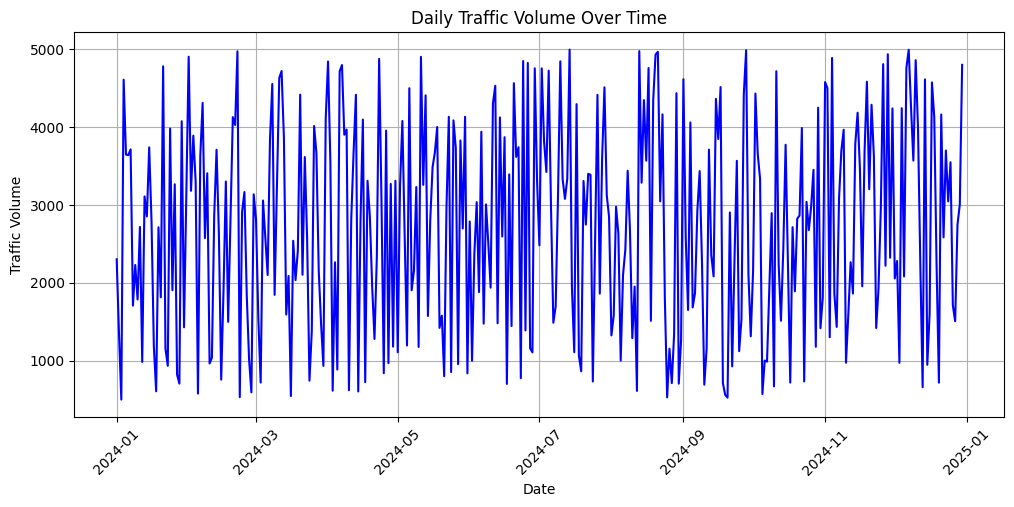

In [4]:
plt.figure(figsize=(12,5))
# lineplot 선 그래프
sns.lineplot(data=df, x=df.index, y='traffic_volume', color='blue')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Daily Traffic Volume Over Time')
plt.xticks(rotation=45) # 날짜 레이블 겹치지 않게 회전
plt.grid() # 보조선 추가

plt.show()

In [11]:
# 요일별

df['weekday'] = df.index.dayofweek # 0: 월요일, 6: 일요일

weekday_avg = df.groupby('weekday')['traffic_volume'].mean()
print(weekday_avg)



weekday
0    2613.169811
1    3010.519231
2    2644.903846
3    2751.442308
4    2708.403846
5    2894.576923
6    2423.903846
Name: traffic_volume, dtype: float64


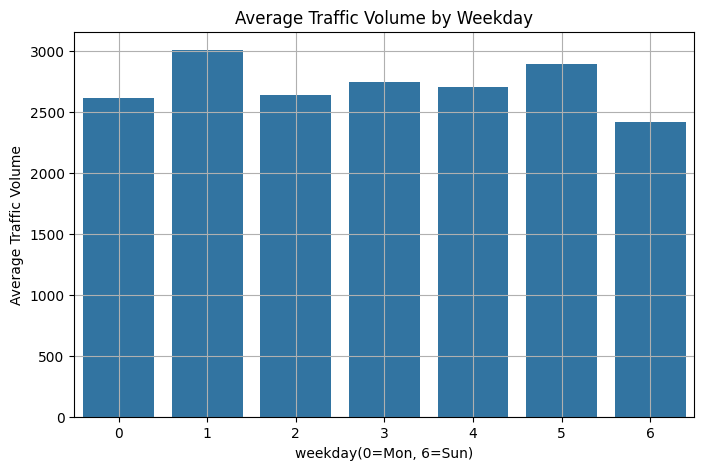

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)

plt.xlabel('weekday(0=Mon, 6=Sun)')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weekday')
plt.grid()

plt.show()

In [5]:
# 월별

df['month'] = df.index.month  # 월 정보 추가
print(df.head())

            traffic_volume  month
date                             
2024-01-01            2301      1
2024-01-02            1342      1
2024-01-03             501      1
2024-01-04            4605      1
2024-01-05            3645      1


In [6]:
# 월별 평균 교통량 계산
monthly_avg = df.groupby('month')['traffic_volume'].mean()

print(monthly_avg)

month
1     2392.419355
2     2674.862069
3     2639.645161
4     2749.033333
5     2750.677419
6     2813.733333
7     3023.419355
8     2574.258065
9     2491.266667
10    2420.290323
11    3117.966667
12    3016.666667
Name: traffic_volume, dtype: float64


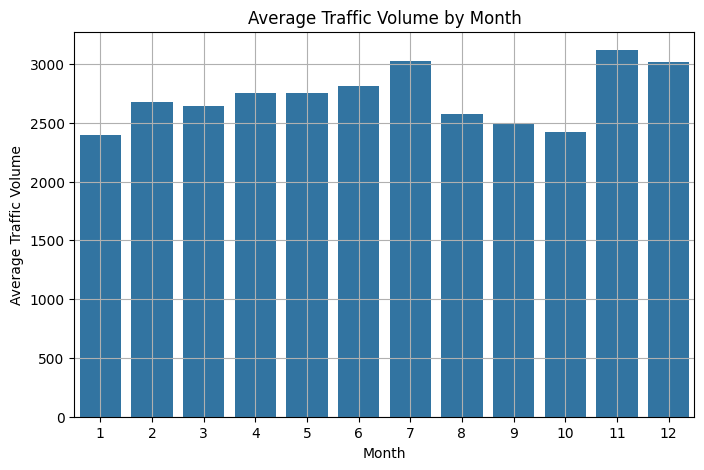

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)

plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Month')
plt.grid()

plt.show()

In [16]:
df.head()

,traffic_volume,month,weekday
date,,,
2024-01-01,2301,1,0
2024-01-02,1342,1,1
2024-01-03,501,1,2
2024-01-04,4605,1,3
2024-01-05,3645,1,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-01 to 2024-12-30
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traffic_volume  365 non-null    int64
 1   month           365 non-null    int32
 2   weekday         365 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 16.7 KB


In [18]:
df = df.reset_index()  # 인덱스를 컬럼으로 변환
print(df.head())

        date  traffic_volume  month  weekday
0 2024-01-01            2301      1        0
1 2024-01-02            1342      1        1
2 2024-01-03             501      1        2
3 2024-01-04            4605      1        3
4 2024-01-05            3645      1        4


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# traffic_data에서 날짜(date)를 독립변수(X), 교통량(traffic_volume)을 종속변수(y)로 설정

# 날짜를 숫자로 변환(선형 회귀 모델은 숫자를 입력값으로 받아서)
df['date'] = pd.to_datetime(df['date']) # 날짜 타입 변환
# Timedelta 객체(시간 차이를 나타내는 타입)를 .dt.days를 사용해 '일(day)단위 정수'로 변환
df['date_numeric']=(df['date']-df['date'].min()).dt.days # 첫 날을 0으로 설정

# X (입력값: 날짜), y (출력값: 교통량)
X = df[['date_numeric']]
y = df['traffic_volume']

# 훈련 데이터 (80%), 테스트 데이터(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
df.head()

,date,traffic_volume,month,weekday,date_numeric
0,2024-01-01,2301,1,0,0
1,2024-01-02,1342,1,1,1
2,2024-01-03,501,1,2,2
3,2024-01-04,4605,1,3,3
4,2024-01-05,3645,1,4,4


In [21]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 에측 수행
y_pred=model.predict(X_test)

In [22]:
# MAE (Mean Absolute Error, 평균 절대 오차)
# MSE (Mean Squared Error, 평균 제곱 오차)

mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print(f'평균 절대 오차 (MAE): {mae:.2f}')
print(f'평균 제곱 오차 (MSE): {mse:.2f}')

평균 절대 오차 (MAE): 1076.31
평균 제곱 오차 (MSE): 1645215.46


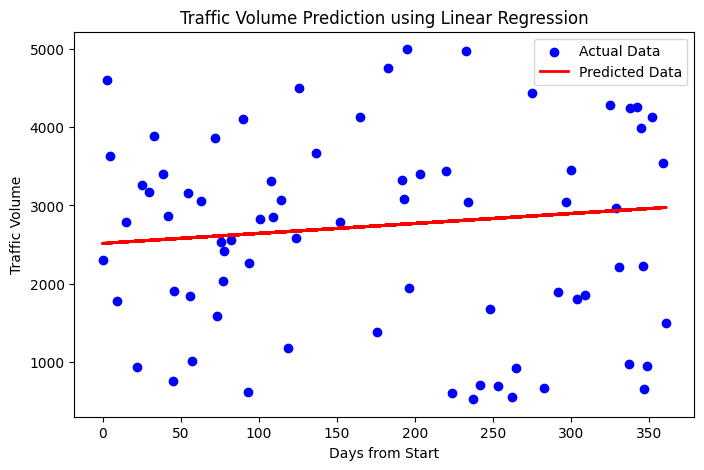

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Data')
plt.xlabel('Days from Start')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Traffic Volume Prediction using Linear Regression')
plt.show()